# Data Science 02: Data Exploration

In [2]:
# install libraries
#%pip install pandas
#%pip install numpy

# import pandas library
import pandas as pd
import numpy as np

In [3]:
# Read clean dataset from file and assign it to variable "df"
other_path = "../../data/raw/clean_timelaps.csv"
df = pd.read_csv(other_path)
df.head()

,id,type_brick,time_start,time_verif,time_dest,time_end,time_start_sec,time_verif_sec,time_dest_sec,time_end_sec,type,start_to_verif,verif_to_dest,dest_to_end,total_time
0,1,CORNER,13:52:18,13:52:24,13:52:42,13:52:58,49938,49944,49962,49978,2,6,18,16,40
1,2,HALF,13:52:58,13:53:02,13:53:18,13:53:36,49978,49982,49998,50016,3,4,16,18,38
2,4,BASIC,13:56:00,13:56:06,13:56:20,13:56:36,50160,50166,50180,50196,1,6,14,16,36
3,6,BASIC,13:58:10,13:58:16,13:58:30,13:58:46,50290,50296,50310,50326,1,6,14,16,36
4,9,BASIC,14:00:34,14:00:42,14:00:54,14:01:18,50434,50442,50454,50478,1,8,12,24,44


<h2 id="basic_insight">Insight of Dataset</h2>
<p>
After reading data into Pandas dataframe, it is time to explore the dataset.<br>

There are several ways to obtain essential insights of the data to help us better understand our dataset.
</p>

<h3>Data Types</h3>
<p>
Data has a variety of types.<br>

The main types stored in Pandas dataframes are <b>object</b>, <b>float</b>, <b>int</b>, <b>bool</b> and <b>datetime64</b>. In order to better learn about each attribute, it is always good for us to know the data type of each column. In Pandas:
</p>


In [4]:
df.dtypes

id                 int64
type_brick        object
time_start        object
time_verif        object
time_dest         object
time_end          object
time_start_sec     int64
time_verif_sec     int64
time_dest_sec      int64
time_end_sec       int64
type               int64
start_to_verif     int64
verif_to_dest      int64
dest_to_end        int64
total_time         int64
dtype: object

<p>
As shown above, it is clear to see that the data type of "total_time" are <code>int64</code>, "type_brick" is <code>object</code> etc.
</p>

<h3>Describe</h3>

If we would like to get a statistical summary of each column e.g. count, column mean value, column standard deviation, etc., we use the describe method:

This method will provide various summary statistics, excluding <code>NaN</code> (Not a Number) values.


In [5]:
df.describe()

,id,time_start_sec,time_verif_sec,time_dest_sec,time_end_sec,type,start_to_verif,verif_to_dest,dest_to_end,total_time
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,68.273973,53002.027397,53010.232877,53025.506849,53042.123288,1.328767,8.205479,15.273973,16.616438,40.095890
std,36.290594,2890.996267,2891.219353,2890.667993,2889.291854,0.817428,3.082022,2.973308,4.172097,3.559668
min,1.000000,48679.000000,48685.000000,48703.000000,48725.000000,1.000000,4.000000,8.000000,8.000000,35.000000
25%,39.000000,50434.000000,50442.000000,50454.000000,50478.000000,1.000000,6.000000,14.000000,14.000000,37.000000
50%,66.000000,51673.000000,51679.000000,51693.000000,51719.000000,1.000000,8.000000,15.000000,16.000000,40.000000
75%,100.000000,55761.000000,55769.000000,55785.000000,55801.000000,1.000000,8.000000,16.000000,18.000000,44.000000
max,133.000000,57357.000000,57367.000000,57375.000000,57394.000000,4.000000,20.000000,24.000000,26.000000,46.000000


<p>
This shows the statistical summary of all numeric-typed (int, float) columns.</p>

<h3>Info about Dataset</h3>

Another method provides a concise summary of your DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [6]:
# look at the info of "df"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              73 non-null     int64 
 1   type_brick      73 non-null     object
 2   time_start      73 non-null     object
 3   time_verif      73 non-null     object
 4   time_dest       73 non-null     object
 5   time_end        73 non-null     object
 6   time_start_sec  73 non-null     int64 
 7   time_verif_sec  73 non-null     int64 
 8   time_dest_sec   73 non-null     int64 
 9   time_end_sec    73 non-null     int64 
 10  type            73 non-null     int64 
 11  start_to_verif  73 non-null     int64 
 12  verif_to_dest   73 non-null     int64 
 13  dest_to_end     73 non-null     int64 
 14  total_time      73 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 8.7+ KB


Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.


<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>
<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<h3 id="data_normalization">Data Normalization</h3>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>

<h3 id="binning">Binning</h3>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

Let's plot the histogram of 'total_time' to see what the distribution of time looks like.

In [7]:
# %pip install matplotlib
# import libraries for plot
import matplotlib.pylab as plt

Text(0.5, 1.0, 'total_time bins')

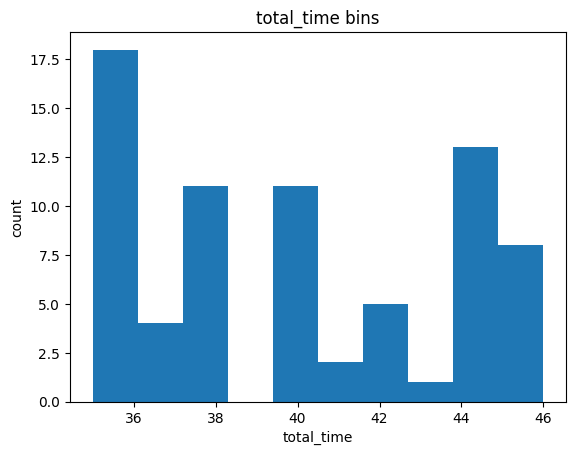

In [8]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["total_time"])

# set x/y labels and plot title
plt.pyplot.xlabel("total_time")
plt.pyplot.ylabel("count")
plt.pyplot.title("total_time bins")

<p>We would like 7 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of total_time, we want to set start_value = min(df["total_time"]).</p>
<p>Since we want to include the maximum value of total_time, we want to set end_value = max(df["total_time"]).</p>
<p>Since we are building 7 bins of equal length, there should be 8 dividers, so numbers_generated = 8.</p>

We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


In [9]:
bins = np.linspace(min(df["total_time"]), max(df["total_time"]), 8)
bins

array([35.        , 36.57142857, 38.14285714, 39.71428571, 41.28571429,
       42.85714286, 44.42857143, 46.        ])

 We set group  names:

In [10]:
group_names = ['Extremely short','Very short','Short', 'Normal', 'Long','Very long','Extremely long']

 We apply the function "cut" to determine what each value of `df['total_time']` belongs to.

In [11]:
df['total_time_binned'] = pd.cut(df['total_time'], bins, labels=group_names, include_lowest=True )
df[['total_time','total_time_binned']].head(20)

,total_time,total_time_binned
0,40,Normal
1,38,Very short
2,36,Extremely short
3,36,Extremely short
4,44,Very long
5,46,Extremely long
6,46,Extremely long
7,46,Extremely long
8,44,Very long
9,44,Very long


Let's see the number of vehicles in each bin:

In [12]:
df["total_time"].value_counts()

total_time
36    16
44    13
40    11
38    11
46     8
42     5
37     4
35     2
41     2
43     1
Name: count, dtype: int64

Let's plot the distribution of each bin:

Text(0.5, 1.0, 'total_time bins')

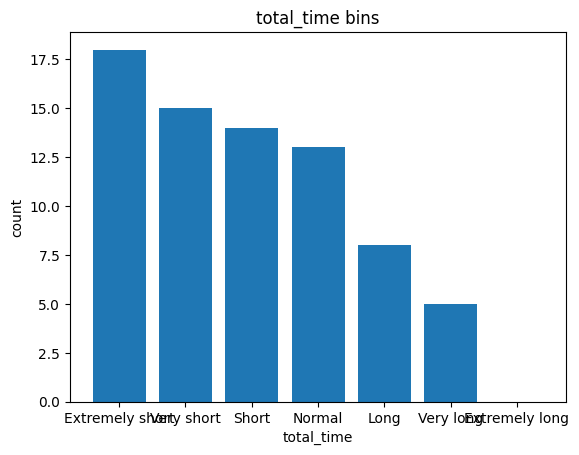

In [13]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["total_time_binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("total_time")
plt.pyplot.ylabel("count")
plt.pyplot.title("total_time bins")

<h3>Bins Visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 


Text(0.5, 1.0, 'total_time bins')

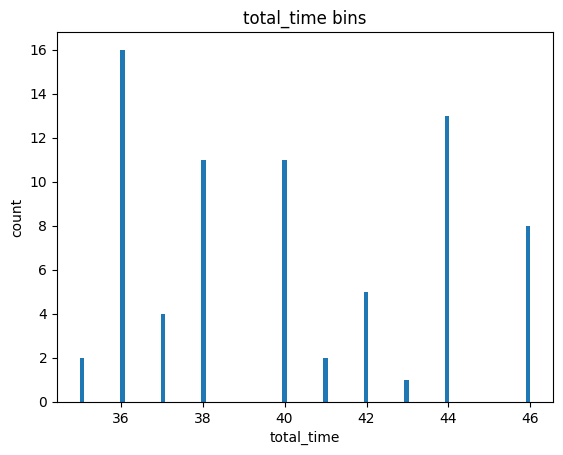

In [14]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "total_time" with bins = 3
plt.pyplot.hist(df["total_time"], bins = 100)

# set x/y labels and plot title
plt.pyplot.xlabel("total_time")
plt.pyplot.ylabel("count")
plt.pyplot.title("total_time bins")

### More Customizable Histograms:

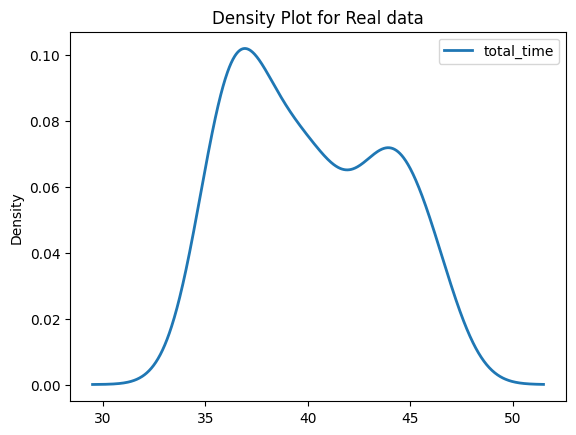

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot density
df[['total_time']].plot.density(bw_method='scott', linestyle='-', linewidth=2)
plt.title('Density Plot for Real data')
plt.show()

The plot above shows the binning result for the attribute "total_time".

<h2 id="indicator">Indicator Variable</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>
<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>

In [15]:
df.columns

Index(['id', 'type_brick', 'time_start', 'time_verif', 'time_dest', 'time_end',
       'time_start_sec', 'time_verif_sec', 'time_dest_sec', 'time_end_sec',
       'type', 'start_to_verif', 'verif_to_dest', 'dest_to_end', 'total_time',
       'total_time_binned'],
      dtype='object')

Get the indicator variables and assign it to data frame "dummy_variable_1":


In [16]:
dummy_variable_1 = pd.get_dummies(df["type_brick"])
dummy_variable_1.head()

,BASIC,CORNER,END,HALF
0,False,True,False,False
1,False,False,False,True
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


Change the column names for clarity:

In [17]:
dummy_variable_1.rename(columns={'BASIC':'brick_basic', 'CORNER':'brick_corner', 'HALF':'brick_half', 'END':'brick_end'}, inplace=True)
dummy_variable_1.head()

,brick_basic,brick_corner,brick_end,brick_half
0,False,True,False,False
1,False,False,False,True
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


In [18]:
# merge data frame "df" and "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "type_brick" from "df"
# df.drop("type_brick", axis = 1, inplace=True)

In [19]:
df.head()

,id,type_brick,time_start,time_verif,time_dest,time_end,time_start_sec,time_verif_sec,time_dest_sec,time_end_sec,type,start_to_verif,verif_to_dest,dest_to_end,total_time,total_time_binned,brick_basic,brick_corner,brick_end,brick_half
0,1,CORNER,13:52:18,13:52:24,13:52:42,13:52:58,49938,49944,49962,49978,2,6,18,16,40,Normal,False,True,False,False
1,2,HALF,13:52:58,13:53:02,13:53:18,13:53:36,49978,49982,49998,50016,3,4,16,18,38,Very short,False,False,False,True
2,4,BASIC,13:56:00,13:56:06,13:56:20,13:56:36,50160,50166,50180,50196,1,6,14,16,36,Extremely short,True,False,False,False
3,6,BASIC,13:58:10,13:58:16,13:58:30,13:58:46,50290,50296,50310,50326,1,6,14,16,36,Extremely short,True,False,False,False
4,9,BASIC,14:00:34,14:00:42,14:00:54,14:01:18,50434,50442,50454,50478,1,8,12,24,44,Very long,True,False,False,False


The last three columns are now the indicator variable representation of the brick-type variable. They're all 0s and 1s now.

In [20]:
df

,id,type_brick,time_start,time_verif,time_dest,time_end,time_start_sec,time_verif_sec,time_dest_sec,time_end_sec,type,start_to_verif,verif_to_dest,dest_to_end,total_time,total_time_binned,brick_basic,brick_corner,brick_end,brick_half
0,1,CORNER,13:52:18,13:52:24,13:52:42,13:52:58,49938,49944,49962,49978,2,6,18,16,40,Normal,False,True,False,False
1,2,HALF,13:52:58,13:53:02,13:53:18,13:53:36,49978,49982,49998,50016,3,4,16,18,38,Very short,False,False,False,True
2,4,BASIC,13:56:00,13:56:06,13:56:20,13:56:36,50160,50166,50180,50196,1,6,14,16,36,Extremely short,True,False,False,False
3,6,BASIC,13:58:10,13:58:16,13:58:30,13:58:46,50290,50296,50310,50326,1,6,14,16,36,Extremely short,True,False,False,False
4,9,BASIC,14:00:34,14:00:42,14:00:54,14:01:18,50434,50442,50454,50478,1,8,12,24,44,Very long,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,120,END,15:46:22,15:46:29,15:46:53,15:47:03,56782,56789,56813,56823,4,7,24,10,41,Normal,False,False,True,False
69,121,END,15:49:23,15:49:31,15:49:43,15:49:59,56963,56971,56983,56999,4,8,12,16,36,Extremely short,False,False,True,False
70,122,BASIC,15:49:59,15:50:05,15:50:19,15:50:34,56999,57005,57019,57034,1,6,14,15,35,Extremely short,True,False,False,False
71,123,BASIC,15:50:34,15:50:49,15:51:01,15:51:15,57034,57049,57061,57075,1,15,12,14,41,Normal,True,False,False,False


Save the new csv:


In [21]:
df.to_csv('../../data/raw/exploration_timelaps.csv', index=False)

#### Author/Date/Organization

Vjaceslav Usmanov, CTU in Prague

###### Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2026-01-20 | 1.1 | Vjaceslav Usmanov| added DS_02_Exploration.ipynb |
| 2026-02-11 | 1.2 | Vjaceslav Usmanov| changed DS_02_Exploration.ipynb |